In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

# Import the dataset from the downloaded kaggle's seattle-weather repository

df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
# Collect information on the dataset's structure
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
# Check the data types of the columns
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [ ]:
# Check for null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
######### Exploring with graphs ############

<Axes: xlabel='weather', ylabel='Count'>

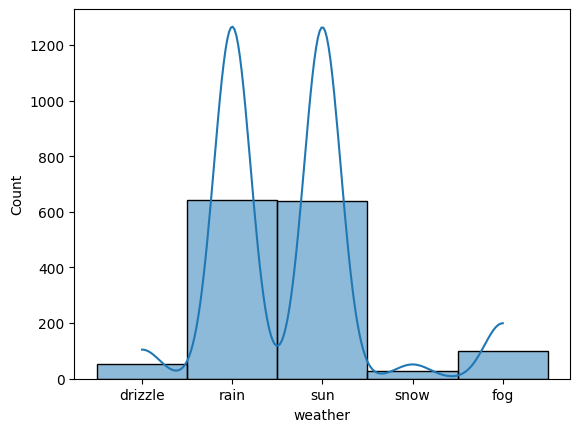

In [ ]:
# Checking the distribution of weather
sns.histplot(df['weather'], bins=30, kde=True)

# Here, we may also know the different weather types to know the kind of encoding we would use for such values.

In [ ]:
# Let us try to group the weather by month and see the variations.

df['month'] = 